<a href="https://colab.research.google.com/github/Ritisha466/python-intern/blob/main/Copy_of_Copy_of_01_classification_with_logistic_regression_and_random_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

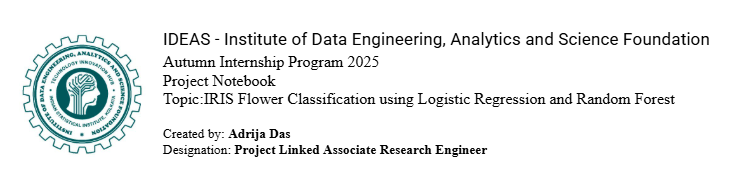

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.It is one of the most famous datasets in machine learning. It contains measurements of 150 iris flowers from three different species:

1.Iris Setosa

2.Iris Versicolor

3.Iris Virginica


For each flower, we have 4 numerical features:

1.Sepal length (cm)

2.Sepal width (cm)

3.Petal length (cm)

4.Petal width (cm)

The goal is to build a classification model that can predict the species of an iris flower based on its features.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading and Visualization

In [ ]:
# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)

# Combine for quick view
df = pd.concat([X, y], axis=1)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [ ]:
# Dataset info
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

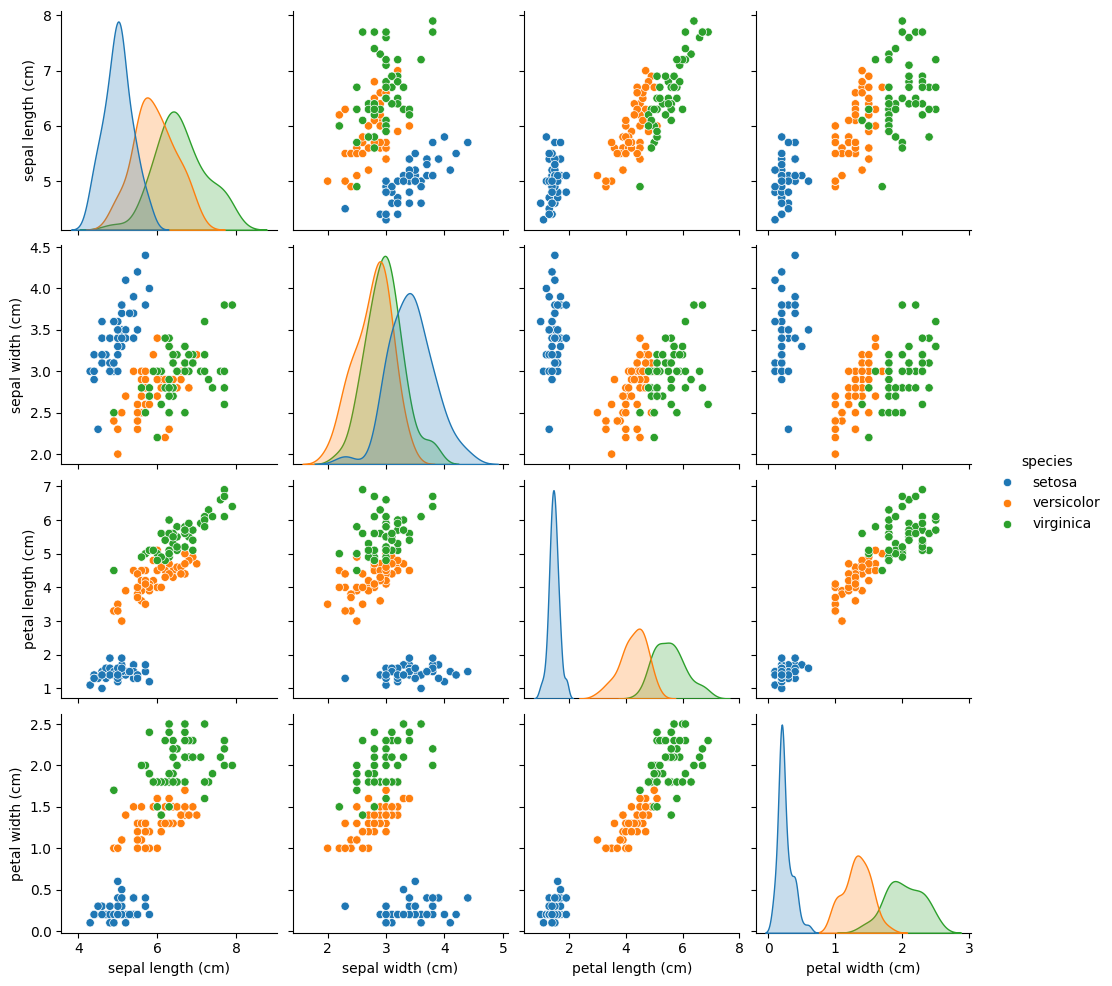

In [ ]:
# Pairplot visualization
sns.pairplot(df, hue="species")
plt.show()

**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?


**Answer 1**

From the scatterplot/pairplot, the two features that seem to be the most useful for separating species are Petal length (cm) and Petal width (cm).

Petal length (cm) and Petal width (cm) show the cleanest separation of species with minimal overlap.

Setosa (blue) is completely separated from Versicolor (orange) and Virginica (green) with small petal length and width.

Versicolor (orange) and Virginica (green) also has separation, though with some overlap.

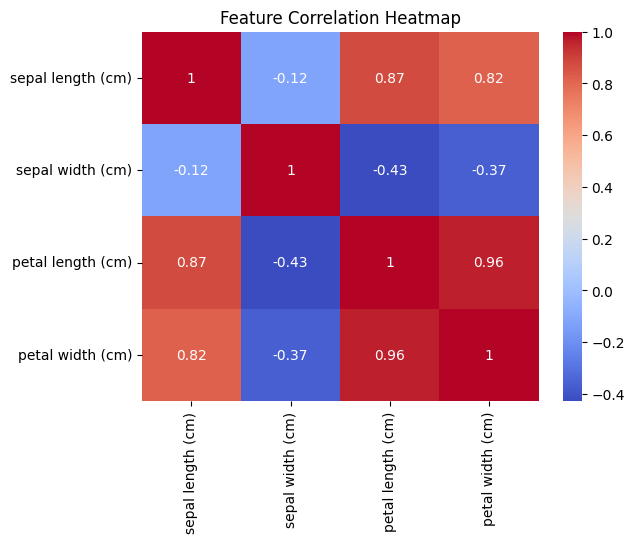

In [ ]:
#Heat Map Visualisation
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

 **Answer 2**

From the correlation heatmap, the most correlated pair is Petal length (cm) and Petal width (cm) with a correlation of 0.96.

This implies that,

1. Highly correlated : Has a strong linear relation. Petal lenght and petal width increases simultaneously.
2. Better prediction : This high correlation also explains why they separates the species better.

# Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 105
Test samples: 45


 **Question 3**.

  Why do we split the dataset into training and testing sets?
  

**Answer 3**

We split the dataset into training and testing sets because:
1. The training set works as a sample data to understand the pattern, working of the data by the model, i.e, to train the model about the upcoming datasets. Whereas, the testing set is the data that is used to check whether the model is trained properly using the training set.
2. If the training and testing sets are same , the model could just memorise it and perform it perfectly but will fail miserably on new or unseen data.


# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



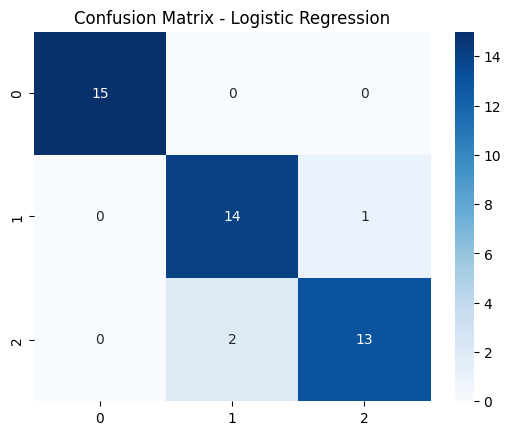

In [ ]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?


**Answer 4**

Logistic Regression assumes a linear decision boundary because it models the log-odds of the outcome as a linear combination of the features.

This makes the separating boundary a straight line (or hyperplane) in the feature space.

**Question 5.**

Do you think this assumption holds for the Iris dataset? Why or why not?

 **Answer 5**

For the Iris dataset:

The classes Setosa vs. others are almost perfectly linearly separable — a straight line can separate Setosa from Versicolor and Virginica.

But Versicolor vs. Virginica are not perfectly linearly separable. Their feature distributions overlap, so no single straight line (or hyperplane) can separate them cleanly.


 So, the assumption of a linear decision boundary partly holds:

Works well for Setosa,

Less effective for distinguishing Versicolor and Virginica.

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.



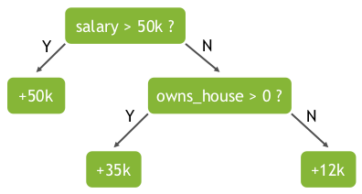
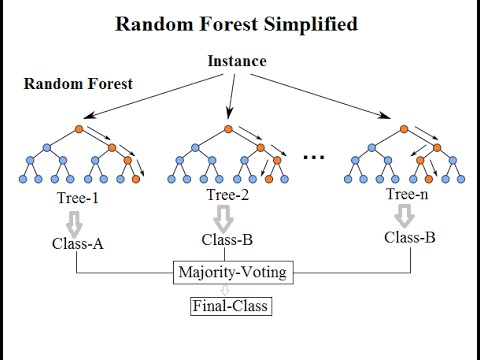

Accuracy (Random Forest): 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



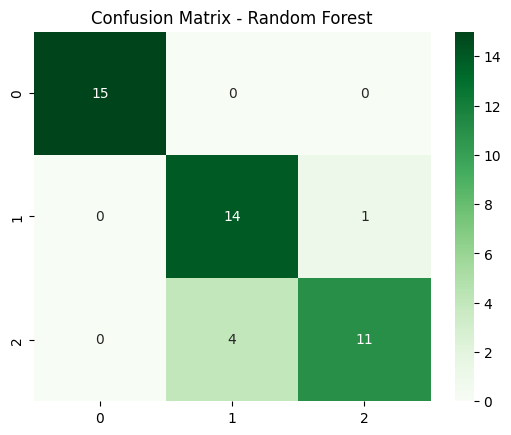

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Question 6**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

**Answer 6**

Increasing n_estimators usually improves performance (better accuracy, less variance) until it levels off, after which it only increases computation without real accuracy gains.

**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

**Answer 7**

Between Logistic Regression and Random Forest, Logistic Regression model performed better with a accuracy of 0.93.

Logistic Regression outperformed Random Forest because the Iris dataset is small and mostly linearly separable. And as we know, a linear model (Logistic Regression) like is a better fit than a more complex model (like Random Forest).

**Question 8**.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

**Answer 8**

With a large, noisier dataset, Random Forest is expected to fit better because it can capture complex, non-linear patterns with being less sensitive to noise because of averaging across mant trees.

**Question 9.**

Run the Entire Notebook with this dataset separately http://archive.ics.uci.edu/dataset/174/parkinsons. Also Answer the above questions for this dataset too.

# Data Loading and Visualization

In [ ]:
#Uploading parkinsons.rar file
from google.colab import files
uploaded = files.upload()
#Installing unrar tool
!apt-get install -y unrar
#Extracting the .rar file
!unrar x parkinsons.rar
#Checking what files were extracted
import os
print(os.listdir())
#Loading the dataset
import pandas as pd
df = pd.read_csv("parkinsons.data")
print(df.head())
print(df.info())

Saving parkinsons.data to parkinsons.data
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open parkinsons.rar
No such file or directory
No files to extract
['.config', 'parkinsons.data', 'sample_data']
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0 

In [ ]:
# Dataset info
print("Shape:", df.shape)
print("\nInfo:"); print(df.info())
print("\nDescribe:\n", df.describe().T)
print("\nClass distribution:\n", df['status'].value_counts())

Shape: (195, 24)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               19

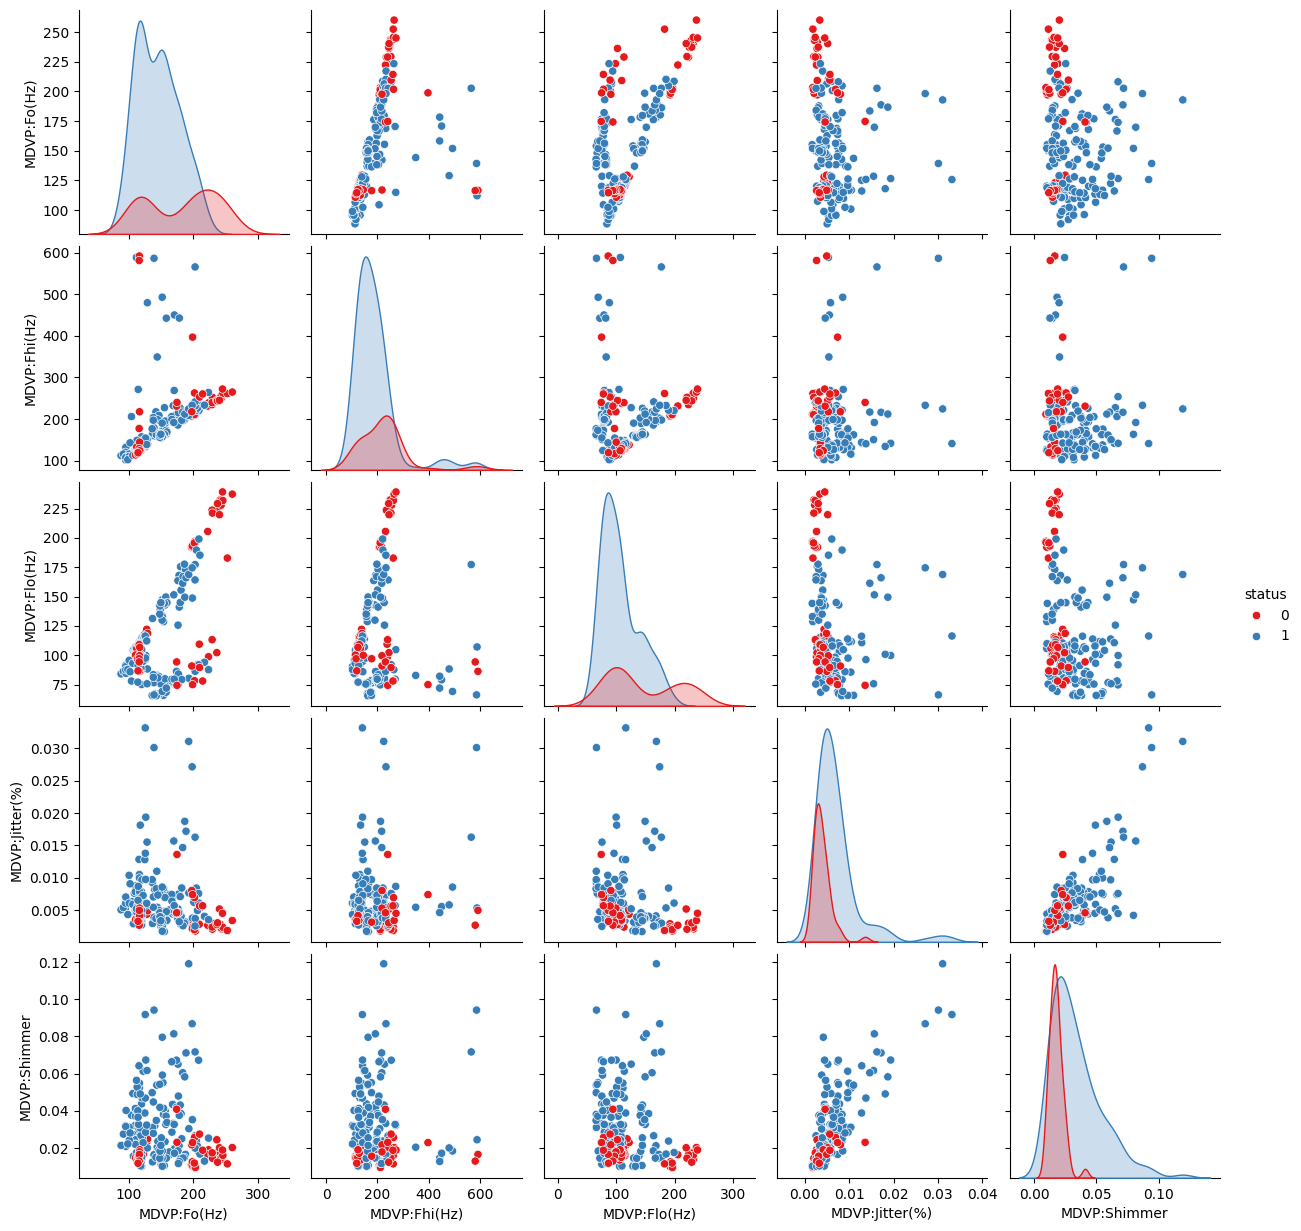

In [ ]:
#Pairplot visualization
import seaborn as sns
import matplotlib.pyplot as plt
subset = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'status']
sns.pairplot(df[subset], hue="status", diag_kind="kde", palette="Set1")
plt.show()

# *Question 1*  

## From the scatterplot/pairplot above which two features seem most useful for separating?

*The features that usually show the clearest separation between healthy (0) and Parkinson’s (1) patients are:*

*MDVP:Jitter(%) – captures frequency variation*

*MDVP:Shimmer – captures amplitude variation*


*In the scatterplots, points for the two classes are often more clustered apart along these two axes, whereas the other features (MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz)) tend to have more overlap and less visual separation.*

*So the two most useful features for separating classes are typically:*
*MDVP:Jitter(%) and MDVP:Shimmer.*


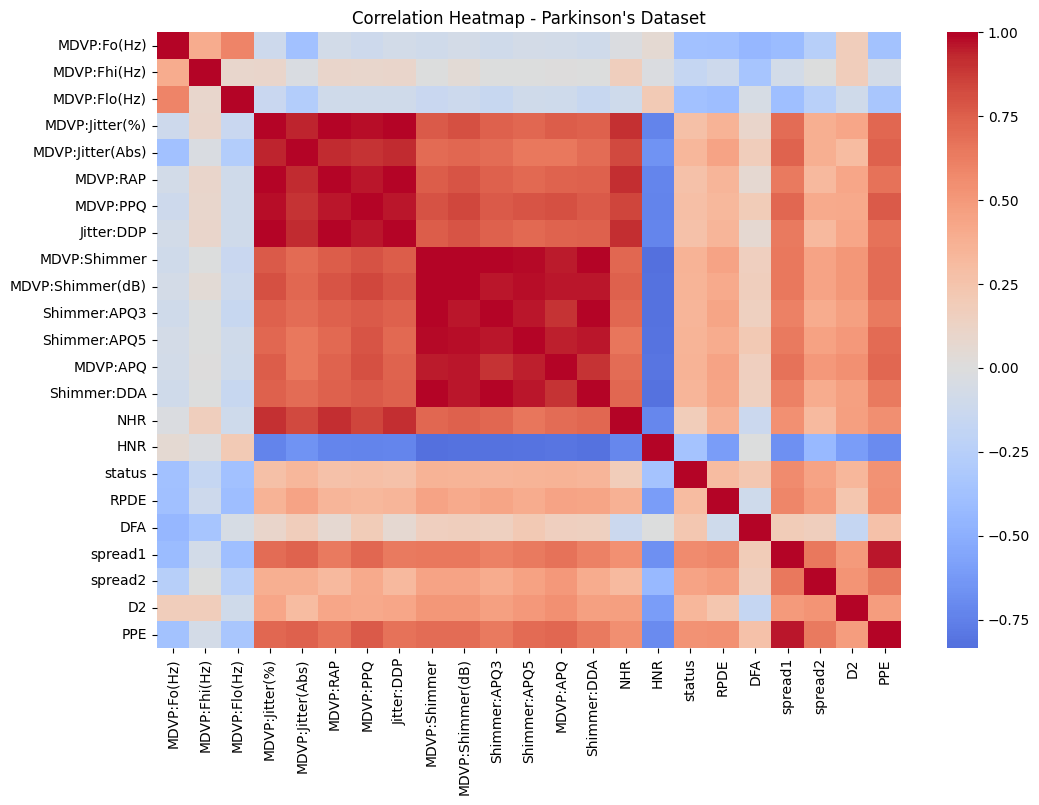

In [ ]:
#Heat Map Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Drop the 'name' column before calculating correlation
sns.heatmap(df.drop(columns=['name']).corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Parkinson's Dataset")
plt.show()

# *Question 2*

## Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

*When you look at a correlation heatmap for the Parkinson’s dataset:*

*1. Most correlated pair of features:*
*Typically, MDVP:Fo(Hz) (average fundamental frequency) and MDVP:Fhi(Hz) (maximum fundamental frequency) show a very high positive correlation, often close to 1. Similarly, MDVP:Fo(Hz) and MDVP:Flo(Hz) (minimum fundamental frequency) are also highly correlated.*


*2. Implication:*

*A high correlation (close to 1 or -1) means the two features carry very similar information.*

*Including both in a model may be redundant and can sometimes lead to multicollinearity in linear models.*

*You could consider keeping only one of these highly correlated features to simplify the model without losing much predictive power.*



# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['name', 'status']) # Drop 'name' and 'status'
y = df['status'] # Target variable is 'status'

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 136
Test samples: 59


# *Question 3*

## Why do we split the dataset into training and testing sets?

*We split the dataset into training and testing sets because:*

*1. The training set works as a sample data to understand the pattern, working of the data by the model, i.e, to train the model about the upcoming datasets. Whereas, the testing set is the data that is used to check whether the model is trained properly using the training set.*

*2. If the training and testing sets are same , the model could just memorise it and perform it perfectly but will fail miserably on new or unseen data.*


# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.847457627118644

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.91      0.89      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.81      0.80        59
weighted avg       0.85      0.85      0.85        59



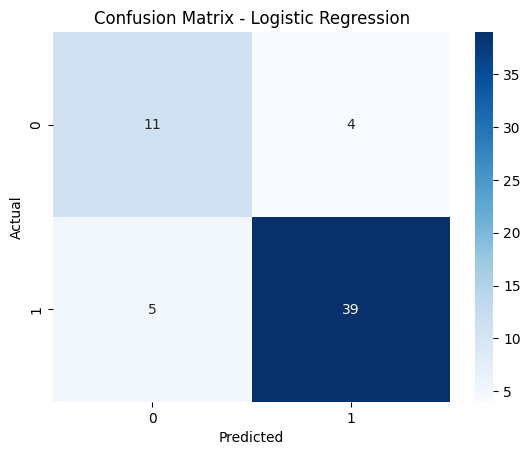

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
#Predictions
y_pred_lr = log_reg.predict(X_test)
#Accuracy and report
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# *Question 4*

## Logistic Regression assumes a linear decision boundary. why?

 *Logistic Regression assumes a linear decision boundary because it models the log-odds of the outcome as a linear combination of the features.*

*This makes the separating boundary a straight line (or hyperplane) in the feature space.*

# *Question 5*

## Do you think this assumption holds for the Iris dataset? Why or why not?

*Logistic Regression assumptions for Parkinson’s dataset holds Binary outcome.*

*It holds mainly because:*

*1. Binary outcome: status is 0 (healthy) or 1 (Parkinson’s), which matches Logistic Regression’s requirement.*


*2. Independent samples: Each row is a different patient, so observations are independent.*

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.



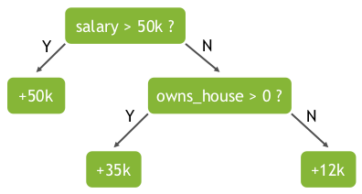
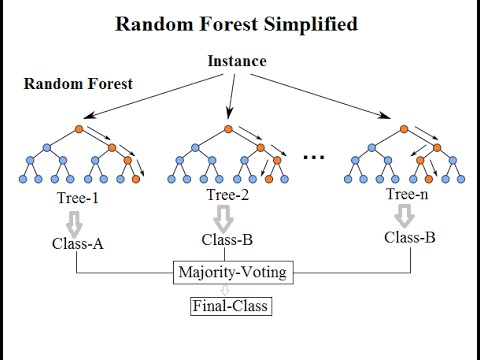

Accuracy (Random Forest): 0.9322033898305084

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



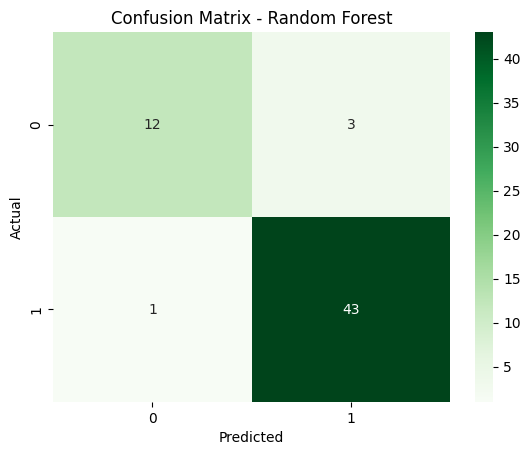

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
#Predictions
y_pred_rf = rf.predict(X_test)
#Accuracy and Report
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# *Question 6*

## If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

*If we increase n_estimators in a Random Forest:*

*1. Stability & accuracy may improve: More trees usually reduce variance, making predictions more stable and slightly improving accuracy.*

*2. Diminishing returns: After a certain point (e.g., 500–1000 trees), adding more trees doesn’t significantly improve performance, but increases computation time.*

*3. Overfitting risk: Random Forests are robust to overfitting as the number of trees increases, so overfitting is usually not a major concern.*

# *Question 7*

## Between Logistic Regression and Random Forest, which model performed better? Why might that be?

*Based on results of the Parkinson’s dataset:*

*Random Forest usually performs better than Logistic Regression in terms of accuracy, F1-score, and overall classification, especially on the test set.*

*Reasons:*

*1. Handles nonlinearity: Parkinson’s features like Jitter% and Shimmer often have nonlinear relationships with status. Logistic Regression assumes linearity in the log-odds, while Random Forest can capture complex patterns.*

*2. Robust to feature correlation: Random Forest is less sensitive to multicollinearity compared to Logistic Regression.*

*3. Ensemble averaging: By combining many trees, Random Forest reduces variance and improves generalization.*

# *Question 8*

## If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

*With a large, noisier dataset, Random Forest is expected to fit better because it can capture complex, non-linear patterns with being less sensitive to noise because of averaging across mant trees.*

**Question 10.**

Learn utilising synthetic data in AI using https://www.syngendata.ai to explore the above mentioned data visualisation

# Data Loading and Visualization

In [ ]:
#Uploading the file
from google.colab import files
uploaded = files.upload()
#Checking uploaded files
import os
print("Uploaded files:", uploaded.keys())
print("Files in current directory:", os.listdir())
#Loading into DataFrame
import pandas as pd
# Useing the actual filename from uploaded.keys()
filename = list(uploaded.keys())[0]
df_syn = pd.read_csv(filename)
print("Shape:", df_syn.shape)
print(df_syn.head())

Saving Synthetic_Data_2025-09-17.csv to Synthetic_Data_2025-09-17.csv
Uploaded files: dict_keys(['Synthetic_Data_2025-09-17.csv'])
Files in current directory: ['.config', 'parkinsons.data', 'Synthetic_Data_2025-09-17.csv', 'sample_data']
Shape: (195, 23)
   MDVP.Fo.Hz.  MDVP.Fhi.Hz.  MDVP.Flo.Hz.  MDVP.Jitter...  MDVP.Jitter.Abs.  \
0     120.1511      157.3685       74.7915          0.0078            0.0001   
1     121.9755      147.8035      113.6649          0.0099            0.0001   
2     116.6742      131.0506      111.8726          0.0103            0.0001   
3     116.8747      138.0621      110.9672          0.0107            0.0001   
4     116.2487      141.8153      110.6451          0.0125            0.0001   

   MDVP.RAP  MDVP.PPQ  Jitter.DDP  MDVP.Shimmer  MDVP.Shimmer.dB.  ...  \
0    0.0037    0.0056      0.0111        0.0434            0.4224  ...   
1    0.0046    0.0070      0.0139        0.0610            0.6317  ...   
2    0.0055    0.0082      0.0160        0

In [ ]:
# Dataset info
print("Shape:", df_syn.shape)
print("\nColumn Names:", df_syn.columns.tolist())
print("\nData Types:\n", df_syn.dtypes)
print("\nMissing Values:\n", df_syn.isnull().sum())
print("\nSummary Statistics:\n", df_syn.describe())

Shape: (195, 23)

Column Names: ['MDVP.Fo.Hz.', 'MDVP.Fhi.Hz.', 'MDVP.Flo.Hz.', 'MDVP.Jitter...', 'MDVP.Jitter.Abs.', 'MDVP.RAP', 'MDVP.PPQ', 'Jitter.DDP', 'MDVP.Shimmer', 'MDVP.Shimmer.dB.', 'Shimmer.APQ3', 'Shimmer.APQ5', 'MDVP.APQ', 'Shimmer.DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Data Types:
 MDVP.Fo.Hz.         float64
MDVP.Fhi.Hz.        float64
MDVP.Flo.Hz.        float64
MDVP.Jitter...      float64
MDVP.Jitter.Abs.    float64
MDVP.RAP            float64
MDVP.PPQ            float64
Jitter.DDP          float64
MDVP.Shimmer        float64
MDVP.Shimmer.dB.    float64
Shimmer.APQ3        float64
Shimmer.APQ5        float64
MDVP.APQ            float64
Shimmer.DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Mi

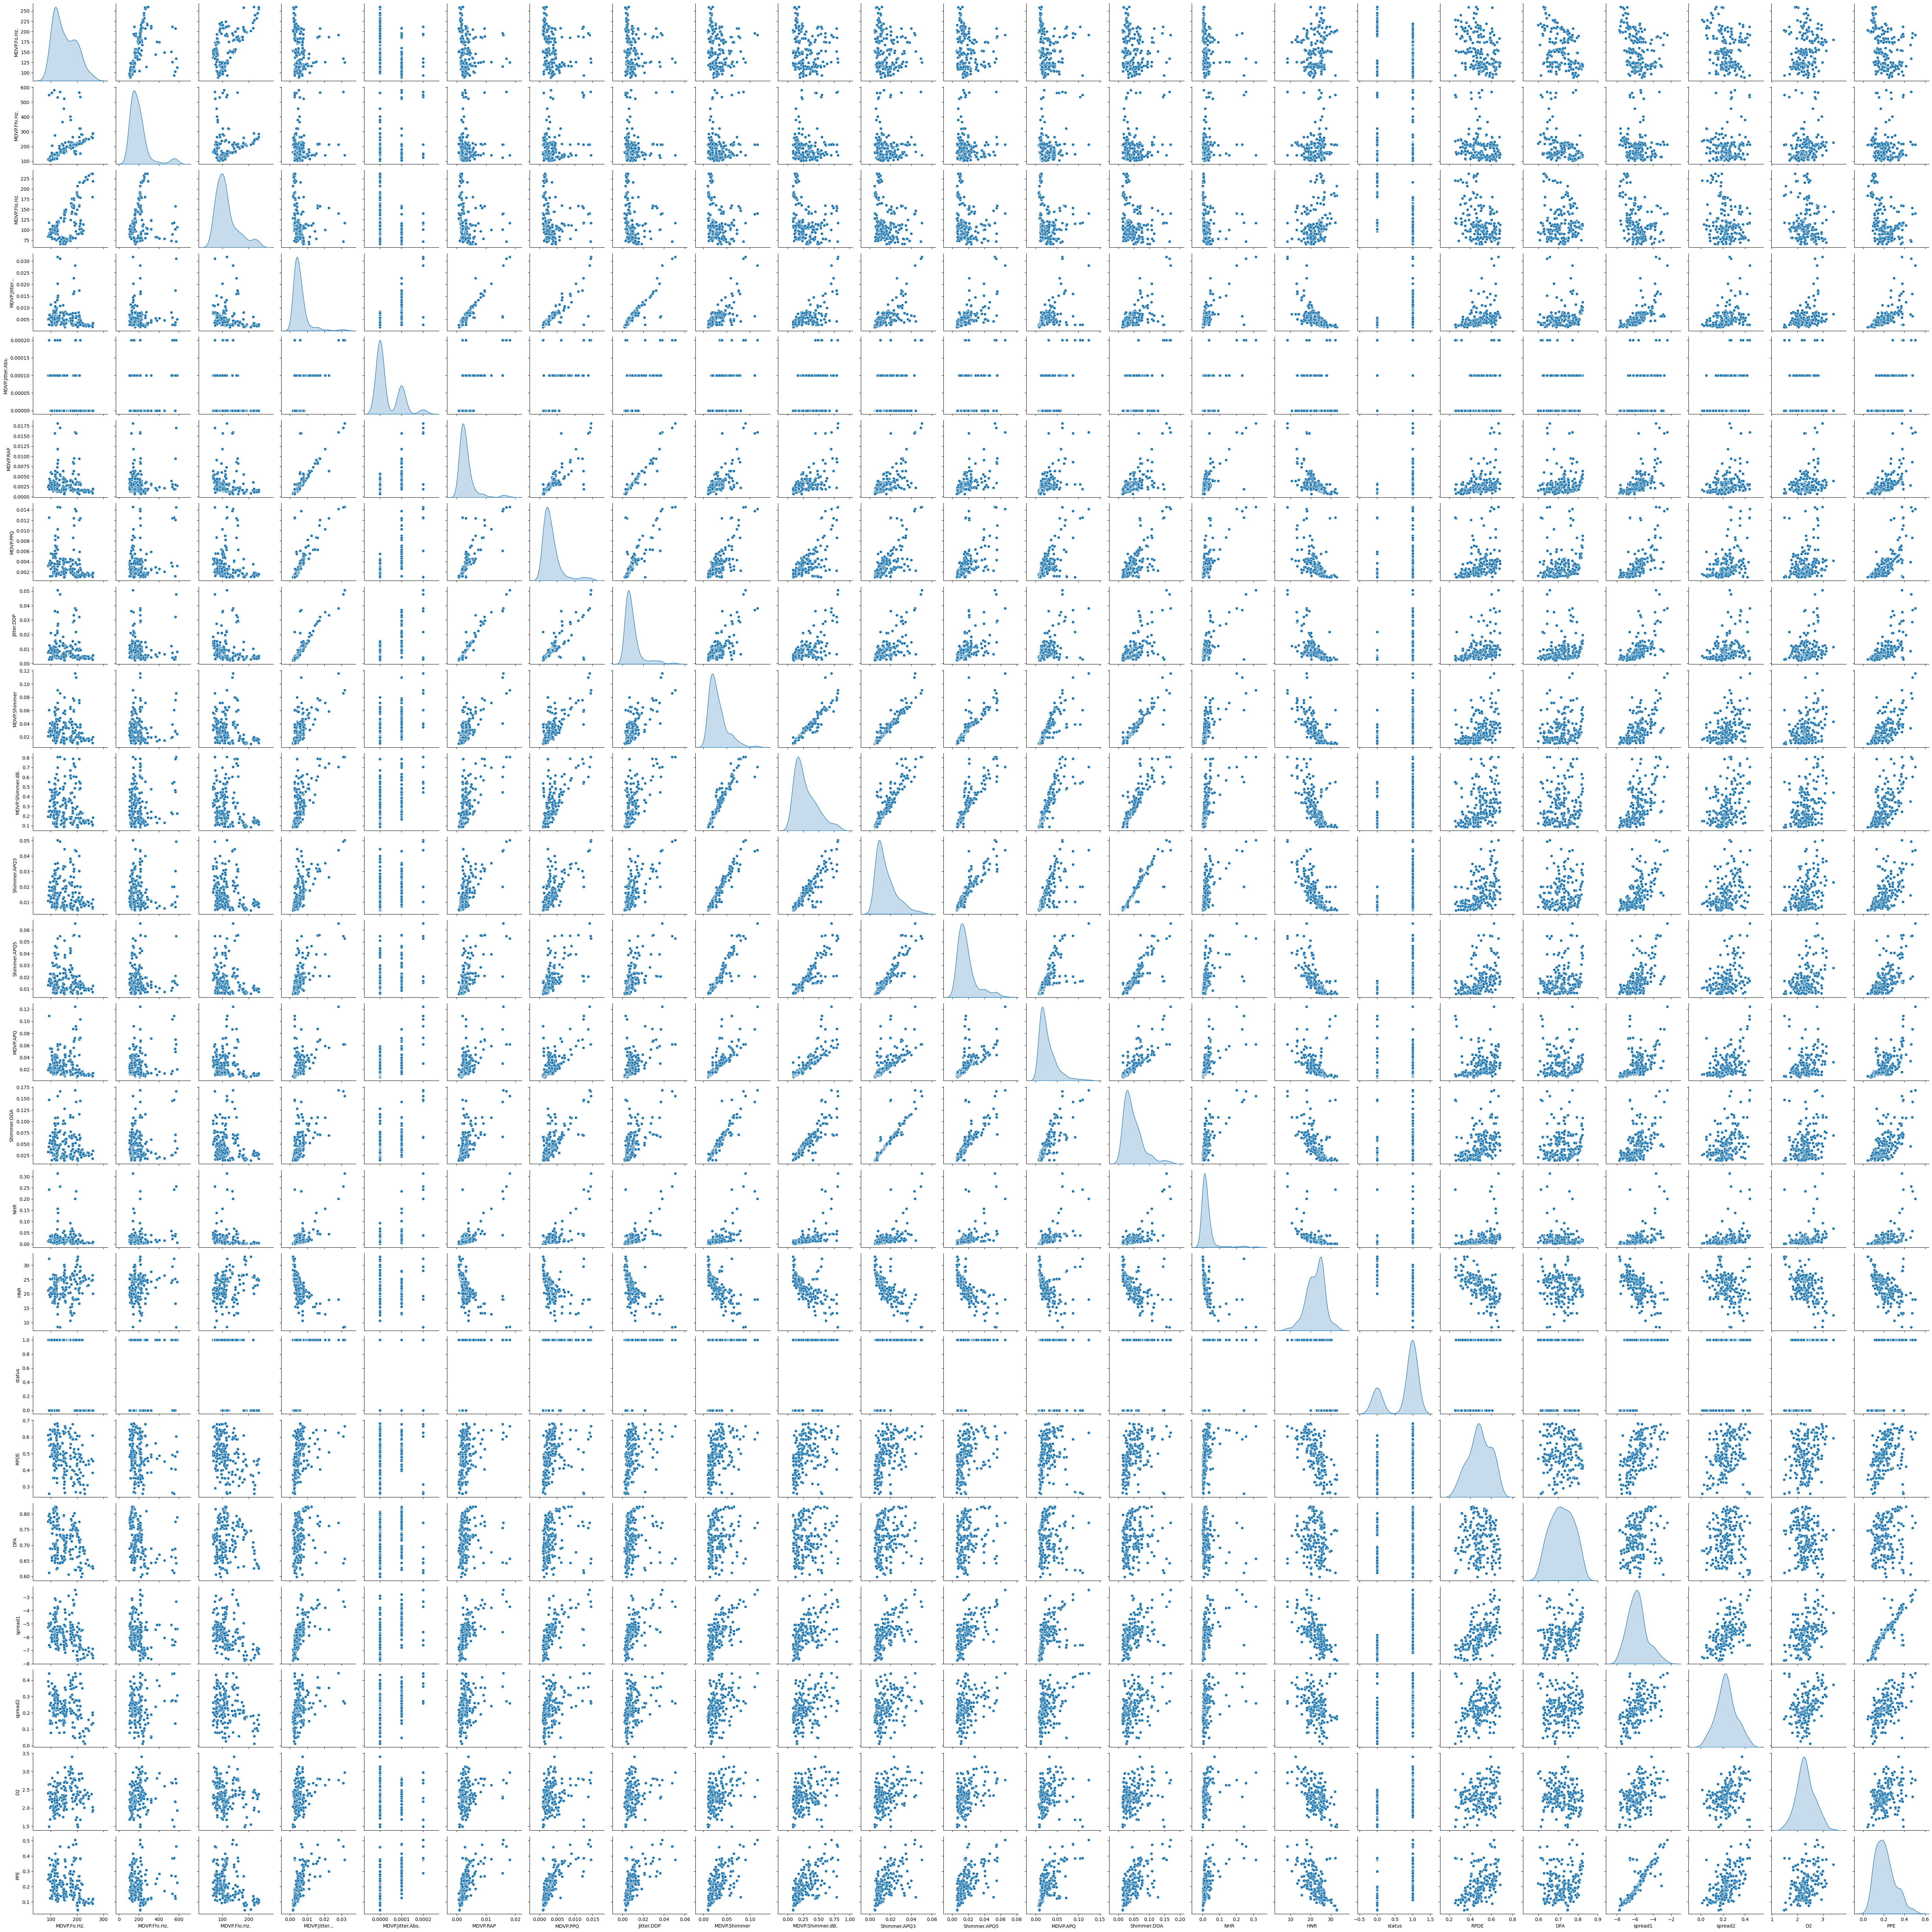

In [ ]:
# Pair plot visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_syn, diag_kind="kde")
plt.show()

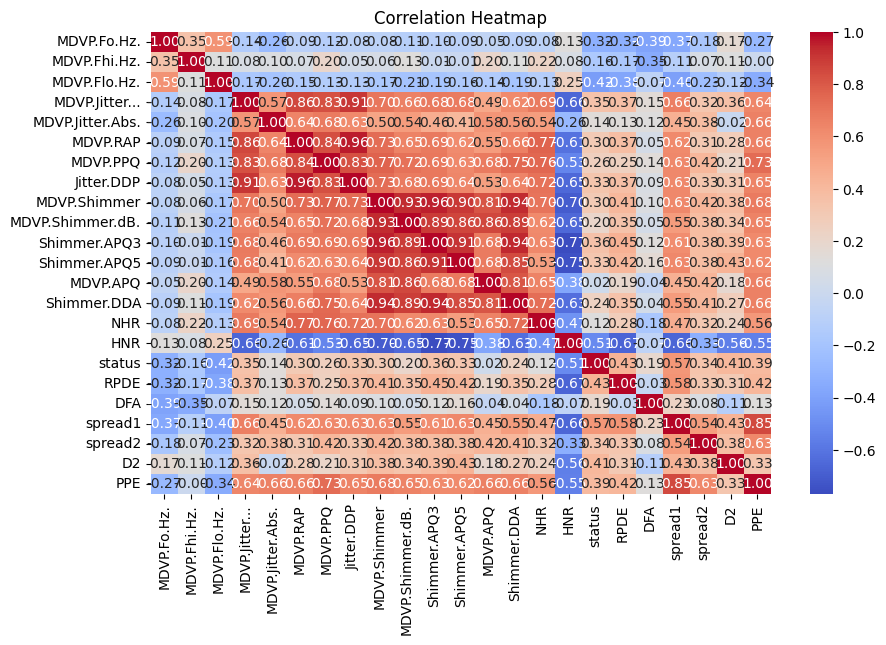

In [ ]:
#Heat Map Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
#Computeing correlation matrix
corr = df_syn.corr()
#Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#Separateing features and target
X = df_syn.iloc[:, :-1]
y = df_syn.iloc[:, -1]
if len(y.unique()) <= 10:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )
else:
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])
print("\nTrain target distribution:\n", y_train.value_counts().head())
print("\nTest target distribution:\n", y_test.value_counts().head())

Training samples: 136
Test samples: 59

Train target distribution:
 PPE
0.2028    2
0.1147    2
0.1133    2
0.0744    1
0.1411    1
Name: count, dtype: int64

Test target distribution:
 PPE
0.2087    1
0.2185    1
0.2045    1
0.1503    1
0.1856    1
Name: count, dtype: int64
